In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
cleandata = '../Data/train.csv'
data = pd.read_csv(cleandata, parse_dates=['date_a', 'date_p'])

In [3]:
chars = ['char_%d_a'%x for x in xrange(1, 11)]
chars.extend(['char_%d_p'%x for x in xrange(1, 11)])
chars.extend(['char_%d'%x for x in xrange(11, 39)])

In [4]:
chars_2 = []
chars_lg = []
for char in chars:
    cnt = len(data[char].unique())
    if cnt == 2:
        chars_2.append(char)
    else:
        chars_lg.append(char)
print 'with 2 types:\t%d\n'%len(chars_2), chars_2
print 'mor2 than 2:\t%d\n'%len(chars_lg), chars_lg

with 2 types:	29
['char_1_p', 'char_10_p', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37']
mor2 than 2:	19
['char_1_a', 'char_2_a', 'char_3_a', 'char_4_a', 'char_5_a', 'char_6_a', 'char_7_a', 'char_8_a', 'char_9_a', 'char_10_a', 'char_2_p', 'char_3_p', 'char_4_p', 'char_5_p', 'char_6_p', 'char_7_p', 'char_8_p', 'char_9_p', 'char_38']


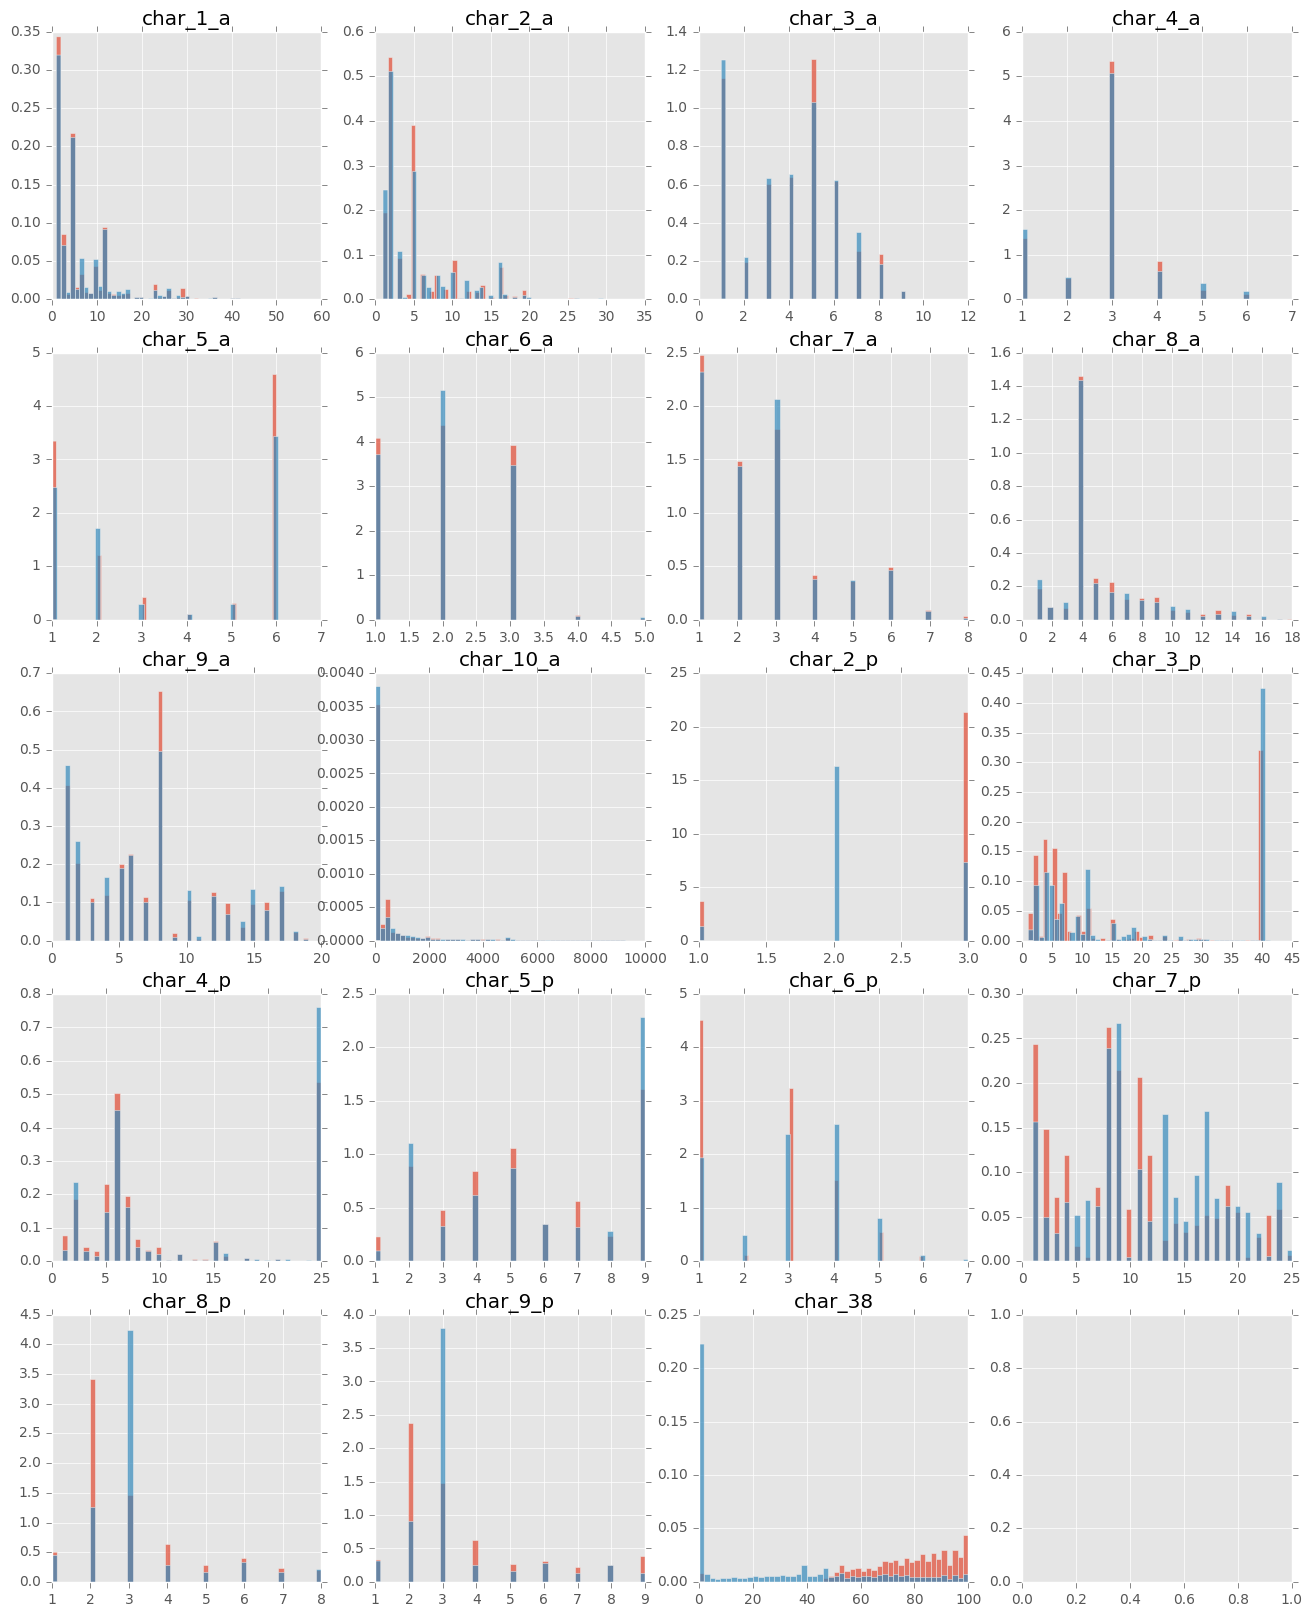

In [5]:
def char_outcome(df, cols):
    fig, axes = plt.subplots(5, 4)
    fig.set_size_inches(16, 20)
    for ax, char in zip(axes.flatten(), cols):
        df[(df['outcome'] == 1)&(df[char] != -1)][char].hist(bins=50, normed=1, alpha=0.7, ax=ax)
#         df[(df['outcome'] == 1)&(df[char] != -1)][char].plot(kind='kde', ax=ax)
        df[(df['outcome'] == 0)&(df[char] != -1)][char].hist(bins=50, normed=1, alpha=0.7, ax=ax)
#         df[(df['outcome'] == 0)&(df[char] != -1)][char].plot(kind='kde', ax=ax)
        ax.set_title(char)
    plt.show()
char_outcome(data, chars_lg)

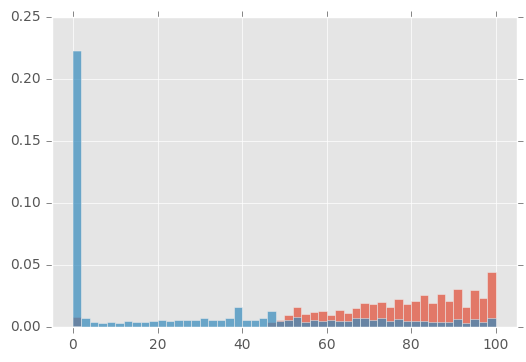

In [19]:
plt.figure()
a = data[(data['outcome'] == 1)&(data['char_38'] != -1)]['char_38'].hist(bins=50, normed=1, alpha=0.7, label='outcome')
# data[(data['outcome'] == 1)&(data['char_38'] != -1)]['char_38'].plot(kind='kde', color='r')
data[(data['outcome'] == 0)&(data['char_38'] != -1)]['char_38'].hist(bins=50, normed=1, alpha=0.7, label='no outcome')
# data[(data['outcome'] == 0)&(data['char_38'] != -1)]['char_38'].plot(kind='kde', color='b')
plt.xlim(-5,105)
plt.show()

In [7]:
data.drop(chars, axis=1).columns

Index([u'people_id', u'activity_id', u'date_a', u'activity_category',
       u'outcome', u'time_a', u'month_a', u'year_a', u'day_a', u'group_1',
       u'date_p', u'time_p', u'month_p', u'year_p', u'day_p', u'days_diff'],
      dtype='object')

In [17]:
data.groupby('group_1')['group_1'].count()

group_1
1          2
2         44
3         37
4         63
5        262
6         71
7         74
8        190
9         65
10        52
11        27
12        33
13        56
14         3
17       190
20       176
21        72
24       427
25        17
26        66
27       338
28        57
29        96
30        13
31       117
32        33
33        60
34       166
35        75
36       365
        ... 
51396      3
51399      2
51403      2
51405      5
51409      2
51414      3
51415      4
51416      2
51417      1
51422      1
51424      1
51428      2
51429      2
51434      4
51435      1
51437      2
51439      1
51441      1
51442      2
51444      3
51446      2
51448      3
51449      2
51450     29
51452      2
51455      2
51458      1
51460      1
51461      3
51462      1
Name: group_1, dtype: int64

In [8]:
from sklearn.feature_selection import chi2, f_classif
X = data[chars].values
X[X==-1] = 999
y = data['outcome']
chi2(X, y)

(array([  5.16098853e+04,   5.19076949e+04,   5.21256373e+04,
          5.21778323e+04,   5.21946081e+04,   5.22586684e+04,
          5.21841358e+04,   5.19527101e+04,   5.18510813e+04,
          3.10940101e+06,   2.50061725e+03,   4.82149986e+04,
          6.28965388e+05,   2.01723537e+05,   1.85593178e+04,
          8.71725536e+04,   1.72822683e+05,   5.67863576e+03,
          3.91052318e+03,   1.20654773e+05,   8.92554888e+04,
          8.50767352e+04,   1.48248029e+05,   1.00339840e+05,
          1.12990938e+05,   1.24830472e+05,   1.30268956e+05,
          8.08060624e+04,   1.25070142e+05,   1.27266221e+05,
          1.24873088e+05,   1.31321456e+05,   1.15750785e+05,
          8.82000181e+04,   1.25034245e+05,   5.45238063e+04,
          9.28544929e+04,   1.23441591e+05,   6.49170182e+04,
          7.76174217e+04,   1.03540685e+05,   1.25111132e+05,
          7.85395637e+04,   1.41289853e+05,   8.11698183e+04,
          1.47703092e+05,   1.34099939e+05,   2.62013789e+07]),
 array

In [9]:
f_classif(X, y)

(array([  7.30903441e+02,   7.32465153e+02,   7.33628127e+02,
          7.32631350e+02,   7.34058762e+02,   7.32561736e+02,
          7.32344922e+02,   7.33244967e+02,   7.34752110e+02,
          1.23562468e+03,   5.76185292e+04,   3.09899943e+05,
          4.57179236e+04,   2.92031691e+04,   1.44965610e+04,
          1.27796132e+05,   4.56191826e+04,   7.34906104e+03,
          3.64653688e+03,   1.71427534e+05,   1.18555621e+05,
          1.17107884e+05,   2.54258091e+05,   1.43506104e+05,
          1.64569658e+05,   1.84953803e+05,   1.97078872e+05,
          1.02835467e+05,   1.86147717e+05,   1.73548884e+05,
          1.85114384e+05,   1.95706003e+05,   1.74545114e+05,
          1.13208158e+05,   1.99990260e+05,   6.75676168e+04,
          1.28195068e+05,   1.83697049e+05,   8.04114854e+04,
          1.02011880e+05,   1.51285418e+05,   1.85333231e+05,
          1.04694408e+05,   2.39515779e+05,   1.06560005e+05,
          2.44333444e+05,   2.00706841e+05,   1.85442436e+06]),
 array

In [10]:
expected

NameError: name 'expected' is not defined